<a href="https://colab.research.google.com/github/AlejandroPSJ2/Data_Mining/blob/main/Clase2_clustering_cat_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#LIBRERIAS BASICAS
!pip install kmodes
from google.colab import files
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from kmodes.kprototypes import KPrototypes
%matplotlib inline

In [3]:
# FUNCIONES PARA CLUSTERING

def normalize(df):
    dfb = df.copy()
    for x in df.columns:
        dfb[x] = (df[x]-df[x].min())/(df[x].max()-df[x].min())
    return dfb   

def centroides(a,b):
    g = {}
    for i in range(0,b.labels_.max()+1):
        g1 = pd.DataFrame(data=b.cluster_centroids_[0][i])
        g2 = pd.DataFrame(data=b.cluster_centroids_[1][i])                 
        g1 = g1.append(g2)
        g[i] = g1.copy()
        g[i].rename(columns={0:i},inplace=True)
        g[i] = g[i].reset_index()
        g[i].drop(columns='index',inplace=True)

    gx = g[0]
    for i in range(1,b.labels_.max()+1):
        gx = gx.join(g[i])

    centroids = pd.DataFrame(data=gx.T)
    centroids = centroids.reset_index()
    centroids.rename(columns={'index':'cluster'},inplace=True)

    cols = a.columns
    num_cols = list(set(a._get_numeric_data().columns))
    cat_cols = list(set(cols) - set(num_cols))

    for i in range(0,len(num_cols)):
        centroids.rename(columns={i:num_cols[i]},inplace=True)
    j = 0
    for i in range(len(num_cols),len(cols)):
        centroids.rename(columns={i:cat_cols[j]},inplace=True)
        j = j+1
    return centroids
    
def clusteres(a,b): 
    lab = pd.DataFrame(data=b)
    ax = a.join(lab)
    ax.rename(columns={0:'cluster'},inplace=True)  
    return ax

def elbow(X,catx):
    cost = []
    K = range(1,7)
    for k in K:
        kproto = KPrototypes(n_clusters=k, init='Cao')
        kproto.fit_predict(X, categorical=catx)
        cost.append(kproto.cost_)

    plt.plot(K,cost, 'bx-')
    plt.xlabel('k')
    plt.ylabel('sum_of_squared_distances')
    plt.title('elbow method for optimal k')
    return cost

In [4]:
#DATA LOADING & PREVIEW

url = 'https://raw.githubusercontent.com/AlejandroPSJ2/Data_Mining/main/Mall_Customers.csv'
df = pd.read_csv(url,sep=';')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_B
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [6]:
#DATA PREPARATION (VERY IMPORTANT TO DIFFERENTIATE "X" AND "DF")

X = df.drop(columns=['CustomerID','Gender_B'])
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
# SEÑALAR COLUMNAS CATEGORICAS (INDICE EMPIEZA EN CERO)

x_cat=[0]

[309884.5177920618, 213911.9076130337, 144390.13168667536, 105413.53157053138, 76398.15928745717, 59313.24990793457]


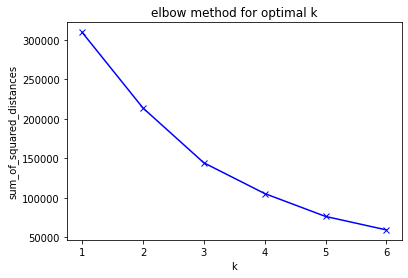

In [8]:
# OPTIMAL NUMBER "K" OF CLUSTERS

print(elbow(X,x_cat))

In [9]:
# ALGORITHM FIT

kproto = KPrototypes(n_clusters=4, init='Cao').fit(X, categorical=x_cat)    # PRECISAR el N° clusters con "n_clusters", init no se cambia  ### Metodos de inicializacion: "Cao","Huang"

In [10]:
# CLUSTER CENTROIDS

# print('Centroides optimos de clusteres')
# print(centroides(X,kproto))

In [11]:
# CLUSTER RESULTS

print('Asignacion de clusteres segun cada observacion')
print(clusteres(df,kproto.labels_).head())

Asignacion de clusteres segun cada observacion
   CustomerID  Gender  Age  ...  Spending Score (1-100)  Gender_B  cluster
0           1    Male   19  ...                      39         1        0
1           2    Male   21  ...                      81         1        0
2           3  Female   20  ...                       6         0        2
3           4  Female   23  ...                      77         0        0
4           5  Female   31  ...                      40         0        2

[5 rows x 7 columns]


In [14]:
# EXPORT RESULTS
#centroides(X,kproto).to_csv('centroides.csv') 
#files.download('centroides.csv')

clusteres(df,kproto.labels_).to_csv('resultados.csv') 
files.download('resultados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#from google.colab import drive
#drive.mount("/content/gdrive")
